# Introduction to Data Science 2024 - Homework 3
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 2, 11:59pm.

In this homework you will read in and analyze a movies dataset. First we'll do some basic analysis with vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable).


## Your Data
Fill out the following information:

*First Name: Logan*   
*Last Name: Correa*   
*E-mail: logan.correa@umail.edu*   
*UID: u1094034*  


In [5]:
# imports
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Part 1: Analyzing Data The Basic Way

In this part we'll do some manual analysis of a movies dataset.

### Task 1.1: Read in the data

Parse the file [movies.csv](movies.csv) using the [csv library](https://docs.python.org/3/library/csv.html). Lecture 6 might be a good inspiration for this.

We recommend that you store the header in a separate array. Make sure that at least the "ratings" and the "votes" columns are cast to the appropriate data types for doing calculations with them.

Print the header, the number of rows and columns, and Row 50 of the table.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
# initialize the top-level array
movies= []

with open("/content/drive/MyDrive/Grad School/Intro to Data Science/Homework/HW3/movies.csv") as csvfile:
  filereader = csv.reader(csvfile)
  for row in filereader:
    movies.append(row)

header = movies.pop(0)
row_len = len(header)
col_len = len(movies)

print("Header:", header)
print("Row Length:", row_len)
print("Column Length:", col_len)
print("Row 50:", movies[49])


Header: ['', 'title', 'year', 'length', 'budget', 'rating', 'votes', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'mpaa', 'Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short']
Row Length: 25
Column Length: 58788
Row 50: ['50', "'What's Your 'I.Q.'?' Number Two", '1940', '9', 'NA', '5.9', '9', '0', '0', '14.5', '14.5', '24.5', '24.5', '14.5', '0', '14.5', '14.5', '', '0', '0', '0', '0', '1', '0', '1']
[['1', '$', '1971', '121', 'NA', '6.4', '348', '4.5', '4.5', '4.5', '4.5', '14.5', '24.5', '24.5', '14.5', '4.5', '4.5', '', '0', '0', '1', '1', '0', '0', '0'], ['2', '$1000 a Touchdown', '1939', '71', 'NA', '6', '20', '0', '14.5', '4.5', '24.5', '14.5', '14.5', '14.5', '4.5', '4.5', '14.5', '', '0', '0', '1', '0', '0', '0', '0'], ['3', '$21 a Day Once a Month', '1941', '7', 'NA', '8.2', '5', '0', '0', '0', '0', '0', '24.5', '0', '44.5', '24.5', '24.5', '', '0', '1', '0', '0', '0', '0', '1'], ['4', '$40,000', '1996', '70', 'NA', '8.2', '6', '14.5', '0

### Task 1.2:  Calculate movie stats

In this task, you will calculate some statistics about movies. We suggest you implement your solutions for Tasks 1.2.1-1.2.3 in one code cell – you should be able to calculate this in a single iteration over the dataset.

#### Task 1.2.1 Calculate average rating
Compute the average rating for all movies and print the output and total.
Your output could look like this:
    
    Average rating: xxx.xxxx, Total movies: xx

#### Task 1.2.2: Calculate average rating for major movies

Compute the average rating for the movies that have more than 250 votes in your loaded dataset and print the output. (We'll call these movies with more than 250 votes *major movies* from now on).

Your output could look like this:
    
    Average rating for major movies: xxx.xxxx, Total major movies: xx

#### Task 1.2.3: Find the highest and the lowest rated major movies

Determine which major movie has the highest rating and which has the lowest rating.

Your output could look like this:
    
    Highest rating: xxx.xxxx, Title: MOVIE TITLE
    Lowest rating: xxx.xxxx, Title: MOVIE TITLE

#### Task 1.2.4: Interpret the data
 * What's the rating relationship of major movies to all movies?
 * Are major movies typically better than the average of all movies?

In [104]:
ratings = []
major_ratings = []
max_rating_info = {"title": None, "rating": float('-inf')}
min_rating_info = {"title": None, "rating": float('inf')}

for row in movies:
    rating = float(row[5])
    ratings.append(rating)

    if int(row[6]) >= 250:
        major_ratings.append(rating)

        if rating > max_rating_info["rating"]:
            max_rating_info["title"] = row[1]
            max_rating_info["rating"] = rating

        if rating < min_rating_info["rating"]:
            min_rating_info["title"] = row[1]
            min_rating_info["rating"] = rating

average_rating = round(sum(ratings) / len(ratings), 2)
average_major_rating = round(sum(major_ratings) / len(major_ratings), 2)

print("Average rating:", average_rating, "Total movies:", len(ratings))
print("Average major rating:", average_major_rating, "Total major movies:", len(major_ratings))
print("Highest rated major movie:", max_rating_info["title"], "Rating:", max_rating_info["rating"])
print("Lowest rated major movie:", min_rating_info["title"], "Rating:", min_rating_info["rating"])

Average rating: 5.93 Total movies: 58788
Average major rating: 6.28 Total major movies: 9390
Highest rated major movie: Mis Rating: 9.3
Lowest rated major movie: Skydivers, The Rating: 1.3


**Your Interpretation**: Out of 58,788 movies, only 9,390 are considered major movies. Major movies tend to score better with an average rating of 6.28 compared to an average rating of 5.93 for all movies.

## Part 2: Pandas

In this part we will use the [Pandas library](http://pandas.pydata.org/pandas-docs/stable) for our analysis.

### Task 2.1: Loading data

Read in the data again. This time you should create a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Print the head of the dataset.
 * How many data rows did you load? How many columns?
 * Of which data types are the columns?
 * Do you have to do manual data type conversions?

In [178]:
df = pd.read_csv("/content/drive/MyDrive/Grad School/Intro to Data Science/Homework/HW3/movies.csv")
df.head()

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0


**Your Interpretation**: TODO

### Task 2.2: Calculate the average rating

Compute the average rating for all movies and print the output and total.
Your output could look like this:
    
    Average rating: xxx.xxxx, Total movies: xx

In [136]:
average_rating = round(df['rating'].mean(),2)
movie_count = len(df)
print("Average rating:", average_rating, "Total movies:", movie_count)

Average rating: 5.93 Total movies: 58788


### Task 2.3: Which is computationally faster?

We want to measure how long it takes to calculate the average using [Pandas](http://pandas.pydata.org/pandas-docs/stable) versus using a for loop (you can copy the relevant parts from Task 1). This is a fast calculation, so running once is not enough. Instead, run both calcuations 500 times (in a loop) and measure the time for the entire loop.

To measure, use [time.process_time()](https://docs.python.org/3/library/time.html#time.process_time) to collect timestamps before and after the loop. The total time is the difference between those timestamps.

Print your results in a human readable way and add a metric to the output. Calculate the factor of the difference and print it. Note that the exact times and the factors will vary when you re-run this and especially between machines.

E.g.:  
    Time the Part 1 way: xxx.xxx s  
    Time using Pandas: xxx.xxx s  
    Difference factor: xxx
    
Interpret the results. Is this difference substantial?     

In [131]:
import time
# Part 1
part1_time = time.process_time()

for i in range(500):
  ratings = []

  for row in movies:
      rating = float(row[5])
      ratings.append(rating)

  average_rating = round(sum(ratings) / len(ratings), 2)
  movie_count = len(movies)

part1_time2 = time.process_time()

# Pandas
pandas_time = time.process_time()

for i in range(500):
  average_rating = round(df['rating'].mean(),2)
  movie_count = len(df)

pandas_time2 = time.process_time()


part1_diff = part1_time2 - part1_time
pandas_diff = pandas_time2 - pandas_time
difference = part1_diff - pandas_diff

print("Part 1 time:", part1_diff, "seconds")
print("Pandas time:", pandas_diff, "seconds")
print("Difference:", difference, "seconds")

Part 1 time: 19.509498623000013 seconds
Pandas time: 0.08679299000002061 seconds
Difference: 19.422705632999993 seconds


**Your Interpretation**: Using Pandas is significantly faster than using the CSV library.

### Task 2.4: Filter out Rows

The whole dataset has about 60,000 moviess. Use pandas to filter your dataframe to contain only the major movies. Then print the total.

E.g.:
    xxx.xxx movies have more than 250 votes.

In [159]:
df_major = df[df["votes"] > 250]
print(len(df_major), "movies have more than 250 votes.")

9370 movies have more than 250 votes.


### Task 2.5: Calculate the average rating for major movies

Compute the average rating for the major movies.
Your output could look like this:
    
    Average rating of major movies: xxx.xxxx

In [147]:
major_average = round(df_major["rating"].mean(),2)
print("Average rating of major movies:", major_average)

Average rating of major movies: 6.28


### Task 2.6: Find the highest and lowest rated major movies

Find the highest rated minor movie and the lowest major movie in the dataframe. Hint: [idxmax()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html) and [idxmin()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmin.html) could be helpful, or you could sort by rating and retrieve the first element.

Print the title and the rating.

Your output could look like this:
    
    Highest rated movie: TITLE, rating: x.x
    Lowest rated movie: TITLE, rating: x.x

In [176]:
df_major_sorted = df_major.sort_values(by='rating', ascending=False)

major_max = df_major_sorted.iloc[0]
major_min = df_major_sorted.iloc[-1]

print("Highest rated movie:", major_max["title"], "Rating:", major_max["rating"])
print("Lowest rated movie:", major_min["title"], "Rating:", major_min["rating"])

Highest rated movie: Mis Rating: 9.3
Lowest rated movie: Skydivers, The Rating: 1.3


### Task 2.7: Create genre subset frames

From the major movies you filtered out in a previous task, find out
 * How many are action.
 * How many are comedies.
 * How many are both, action and comedies.

Create new dataframed for each of these subsets.

Hint: you can combine broadcasting statements with a boolean and using the `&` operator.

Print the results, e.g.:  

    xxx.xxx major movies are action.
    xxx.xxx major movies are comedies.
    xxx.xxx major movies are both action and comedy.

In [185]:
df_action = df_major[df_major["Action"] == 1]
df_comedy = df_major[df_major["Comedy"] == 1]
df_action_comedy = df_major[(df_major["Action"] == 1) & (df_major["Comedy"] == 1)]

print(len(df_action), "movies are action.")
print(len(df_comedy), "movies are comedy.")
print(len(df_action_comedy), "movies are both action and comedy.")


1441 movies are action.
3571 movies are comedy.
371 movies are both action and comedy.


### Task 2.8: Compare ratings of different categories

Now we want to compare the ratings for action and comedy among the major movies.

Compute the average rating, maximum rating, minimum rating, standard deviation, and the median for each category. Hint: there is a function that does all of this in one line.

What do these numbers tell us? Provide an interpretation.

In [190]:
stats_action = df_action['rating'].agg(['mean', 'max', 'min', 'std', 'median'])
stats_comedy = df_comedy['rating'].agg(['mean', 'max', 'min', 'std', 'median'])

print("Statistics for Action Movies:")
print(stats_action)

print("\nStatistics for Comedy Movies:")
print(stats_comedy)

Statistics for Action Movies:
mean      5.820472
max       9.000000
min       1.400000
std       1.342237
median    5.900000
Name: rating, dtype: float64

Statistics for Comedy Movies:
mean      6.110557
max       9.300000
min       1.700000
std       1.219507
median    6.200000
Name: rating, dtype: float64


**Your Interpretation**: Comedy movies tend to do better than action movies with higher mean, max and meadian ratings.

### Task 2.9: Major movies over time

Calcluate how many major movies in this dataset were made in each year.

Print the number like this, sorted by year:

    year   number of movies
    1902    xxx
    1903    xxx
    ...     ...

Use this data to render a line chart of the number of movies per year.

In [240]:
year_counts = df_major['year'].value_counts().sort_index().reset_index()
year_counts.columns = ['year', 'number of movies']

print(year_counts)

    year  number of movies
0   1902                 1
1   1903                 1
2   1915                 2
3   1916                 3
4   1917                 3
..   ...               ...
88  2001               414
89  2002               445
90  2003               372
91  2004               295
92  2005                42

[93 rows x 2 columns]


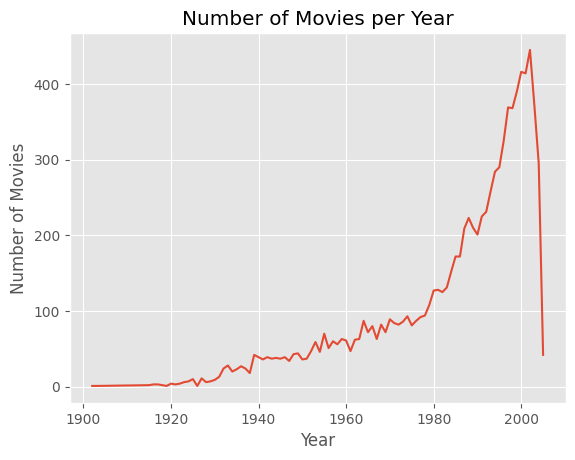

In [209]:
plt.plot(year_counts["year"], year_counts["number of movies"])
plt.title("Number of Movies per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

### Task 2.10: Yearly average

Compute the average number of votes per year for all major movies.  
Use the numbers you computed to plot a line chart. Plot the year on the x-axis and the average number of votes on the y axis.  

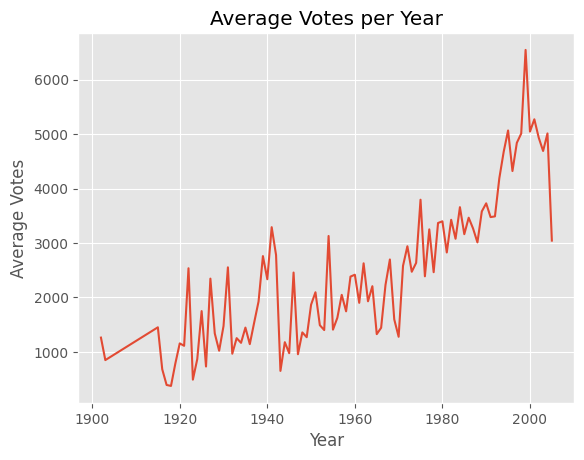

In [210]:
average_year_votes = df_major.groupby('year')['votes'].mean().reset_index()
average_year_votes.columns = ['year', 'average votes']

plt.plot(average_year_votes["year"], average_year_votes["average votes"])
plt.title("Average Votes per Year")
plt.xlabel("Year")
plt.ylabel("Average Votes")
plt.show()

### Task 2.11: Explore and Interpret

Are old movies better? How could you explain this?

Is 250 votes a good threshhold for the title 'major' movie?

Continue to explore and use plots to inform your answer. Interesting measures to consider are the total number of votes per year, the average number of votes for a movie in a particular year, etc.

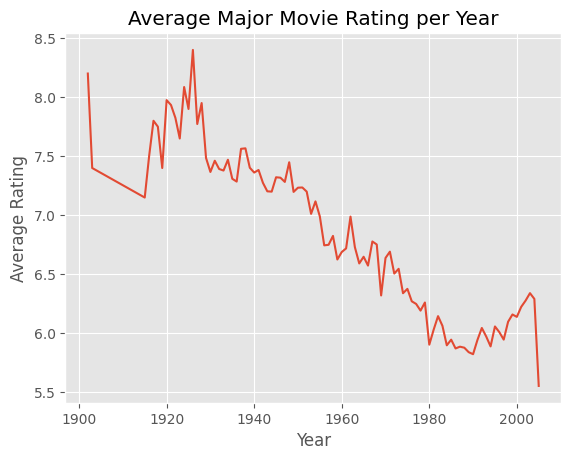

In [223]:
# Average year rating
average_year_rating = df_major.groupby('year')['rating'].mean().reset_index()
average_year_rating.columns = ['year', 'average rating']

plt.plot(average_year_rating["year"], average_year_rating["average rating"])
plt.title("Average Major Movie Rating per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

Voting Stats:
mean         632.130384
max       157608.000000
min            5.000000
std         3829.621413
median        30.000000
Name: votes, dtype: float64


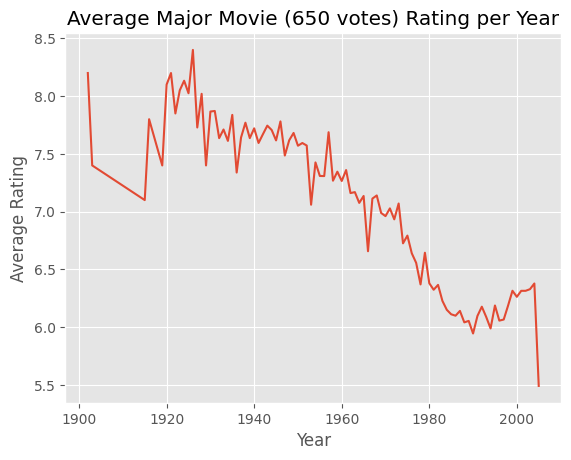

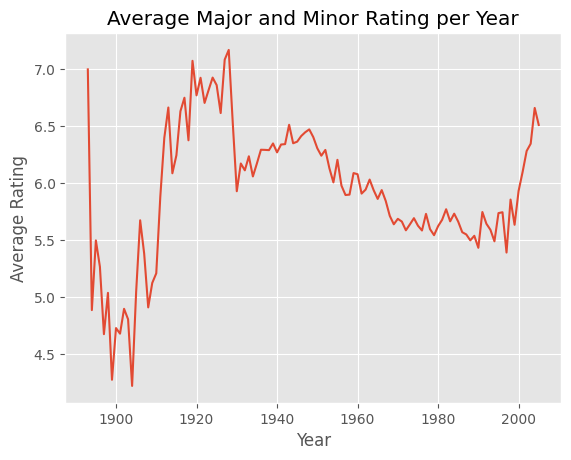

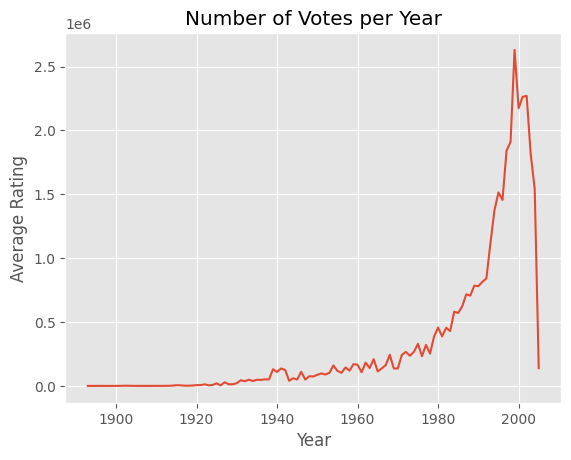

In [256]:
# Votes stats
stats_votes = df['votes'].agg(['mean', 'max', 'min', 'std', 'median'])
print("Voting Stats:")
print(stats_votes)

df_major_adjusted = df[df["votes"] > 650]

average_year_rating = df_major_adjusted.groupby('year')['rating'].mean().reset_index()
average_year_rating.columns = ['year', 'average rating']

plt.plot(average_year_rating["year"], average_year_rating["average rating"])
plt.title("Average Major Movie (650 votes) Rating per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()
print()

average_year_rating = df.groupby('year')['rating'].mean().reset_index()
average_year_rating.columns = ['year', 'average rating']

plt.plot(average_year_rating["year"], average_year_rating["average rating"])
plt.title("Average Major and Minor Rating per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()
print()

votes_per_year = df.groupby('year')['votes'].sum().reset_index()
votes_per_year.columns = ['year', 'total votes']

plt.plot(votes_per_year["year"], votes_per_year["total votes"])
plt.title("Number of Votes per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")

plt.show()

**Your interpretation**: Older movies tend to have higher ratings than newer movies. I believe 250 votes is a good threshold to define a "major movie". When the threshold is set to 650 (closer to the average number of votes for a movie), the data trends that are seen within the 250 threshold are still relavent. I would not lower the threshold because there are a significant of movies that have very low vote counts and inclusion of these would skew the data towards the left.